In [267]:
import random 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import recall_score

In [268]:
train = pd.read_csv('Train.csv')
train.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


In [269]:
test = pd.read_csv('Test.csv')
test.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,458989,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,Cat_6
1,458994,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0,Cat_6
2,458996,Female,Yes,69,No,NaN,0.0,Low,1.0,Cat_6
3,459000,Male,Yes,59,No,Executive,11.0,High,2.0,Cat_6
4,459001,Female,No,19,No,Marketing,NaN,Low,4.0,Cat_6


In [270]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   object 
 2   Ever_Married     7928 non-null   object 
 3   Age              8068 non-null   int64  
 4   Graduated        7990 non-null   object 
 5   Profession       7944 non-null   object 
 6   Work_Experience  7239 non-null   float64
 7   Spending_Score   8068 non-null   object 
 8   Family_Size      7733 non-null   float64
 9   Var_1            7992 non-null   object 
 10  Segmentation     8068 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 693.5+ KB


In [271]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2627 entries, 0 to 2626
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               2627 non-null   int64  
 1   Gender           2627 non-null   object 
 2   Ever_Married     2577 non-null   object 
 3   Age              2627 non-null   int64  
 4   Graduated        2603 non-null   object 
 5   Profession       2589 non-null   object 
 6   Work_Experience  2358 non-null   float64
 7   Spending_Score   2627 non-null   object 
 8   Family_Size      2514 non-null   float64
 9   Var_1            2595 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 205.4+ KB


In [272]:
train.isnull().sum()

ID                   0
Gender               0
Ever_Married       140
Age                  0
Graduated           78
Profession         124
Work_Experience    829
Spending_Score       0
Family_Size        335
Var_1               76
Segmentation         0
dtype: int64

In [273]:
test.isnull().sum()

ID                   0
Gender               0
Ever_Married        50
Age                  0
Graduated           24
Profession          38
Work_Experience    269
Spending_Score       0
Family_Size        113
Var_1               32
dtype: int64

In [274]:
100 * train.isnull().sum() / len(train)

ID                  0.000000
Gender              0.000000
Ever_Married        1.735250
Age                 0.000000
Graduated           0.966782
Profession          1.536936
Work_Experience    10.275161
Spending_Score      0.000000
Family_Size         4.152206
Var_1               0.941993
Segmentation        0.000000
dtype: float64

In [275]:
100 * test.isnull().sum() / len(test)

ID                  0.000000
Gender              0.000000
Ever_Married        1.903312
Age                 0.000000
Graduated           0.913590
Profession          1.446517
Work_Experience    10.239817
Spending_Score      0.000000
Family_Size         4.301485
Var_1               1.218120
dtype: float64

In [276]:
train1 = train.drop(['Segmentation'], axis =1) 

In [277]:
train1.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6


In [278]:
train1.isnull().sum()

ID                   0
Gender               0
Ever_Married       140
Age                  0
Graduated           78
Profession         124
Work_Experience    829
Spending_Score       0
Family_Size        335
Var_1               76
dtype: int64

In [279]:
from sklearn import preprocessing 
from sklearn.preprocessing import LabelEncoder

In [280]:
# Label Encoding
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

for x in train1.columns:
    if train1[x].dtype == type(object):
        train1[x] = train1[x].fillna('NaN')
        test[x] = test[x].fillna('NaN')
        encoder = LabelEncoder()
        encoder.fit(list(set(list(train1[x]) + list(test[x]))))
        train1[x] = encoder.transform(train1[x])
        test[x] = encoder.transform(test[x])

In [281]:
train1.isnull().sum()

ID                   0
Gender               0
Ever_Married         0
Age                  0
Graduated            0
Profession           0
Work_Experience    829
Spending_Score       0
Family_Size        335
Var_1                0
dtype: int64

In [282]:
test.isnull().sum()

ID                   0
Gender               0
Ever_Married         0
Age                  0
Graduated            0
Profession           0
Work_Experience    269
Spending_Score       0
Family_Size        113
Var_1                0
dtype: int64

In [283]:
train_n = train1.drop('ID', axis = 1) 
test_n = test.drop('ID', axis = 1)

In [284]:
train_n.head()
# test_n.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,1,1,22,1,5,1.0,2,4.0,3
1,0,2,38,2,2,NaN,0,3.0,3
2,0,2,67,2,2,1.0,2,1.0,5
3,1,2,67,2,7,0.0,1,2.0,5
4,0,2,40,2,3,NaN,1,6.0,5


In [285]:
# train = pd.concat([train1, train[['Segmentation']]], axis=1)

In [286]:
# train.head()

In [287]:
from sklearn.impute import KNNImputer

In [288]:
imputer = KNNImputer(n_neighbors=5)

In [289]:
df_train = imputer.fit_transform(train_n)

In [290]:
train_t = pd.DataFrame(data = df_train, columns=['Gender','Ever_Married','Age','Graduated','Profession','Work_Experience','Spending_Score','Family_Size','Var_1'])

In [291]:
train_t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           8068 non-null   float64
 1   Ever_Married     8068 non-null   float64
 2   Age              8068 non-null   float64
 3   Graduated        8068 non-null   float64
 4   Profession       8068 non-null   float64
 5   Work_Experience  8068 non-null   float64
 6   Spending_Score   8068 non-null   float64
 7   Family_Size      8068 non-null   float64
 8   Var_1            8068 non-null   float64
dtypes: float64(9)
memory usage: 567.4 KB


In [292]:
df_test = imputer.fit_transform(test_n)

In [293]:
test_t = pd.DataFrame(data = df_test, columns=['Gender','Ever_Married','Age','Graduated','Profession','Work_Experience','Spending_Score','Family_Size','Var_1'])

In [294]:
test_t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2627 entries, 0 to 2626
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           2627 non-null   float64
 1   Ever_Married     2627 non-null   float64
 2   Age              2627 non-null   float64
 3   Graduated        2627 non-null   float64
 4   Profession       2627 non-null   float64
 5   Work_Experience  2627 non-null   float64
 6   Spending_Score   2627 non-null   float64
 7   Family_Size      2627 non-null   float64
 8   Var_1            2627 non-null   float64
dtypes: float64(9)
memory usage: 184.8 KB


In [295]:
train_t.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,1.0,1.0,22.0,1.0,5.0,1.0,2.0,4.0,3.0
1,0.0,2.0,38.0,2.0,2.0,3.8,0.0,3.0,3.0
2,0.0,2.0,67.0,2.0,2.0,1.0,2.0,1.0,5.0
3,1.0,2.0,67.0,2.0,7.0,0.0,1.0,2.0,5.0
4,0.0,2.0,40.0,2.0,3.0,4.8,1.0,6.0,5.0


In [296]:
test_t.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,0.0,2.0,36.0,2.0,2.0,0.0,2.0,1.0,5.0
1,1.0,2.0,37.0,2.0,5.0,8.0,0.0,4.0,5.0
2,0.0,2.0,69.0,1.0,9.0,0.0,2.0,1.0,5.0
3,1.0,2.0,59.0,1.0,4.0,11.0,1.0,2.0,5.0
4,0.0,1.0,19.0,1.0,8.0,2.0,2.0,4.0,5.0


In [297]:
train_final = pd.concat([train_t, train['Segmentation']], axis=1)


# result = pd.concat([df1, df4],

In [298]:
train_final.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,1.0,1.0,22.0,1.0,5.0,1.0,2.0,4.0,3.0,D
1,0.0,2.0,38.0,2.0,2.0,3.8,0.0,3.0,3.0,A
2,0.0,2.0,67.0,2.0,2.0,1.0,2.0,1.0,5.0,B
3,1.0,2.0,67.0,2.0,7.0,0.0,1.0,2.0,5.0,B
4,0.0,2.0,40.0,2.0,3.0,4.8,1.0,6.0,5.0,A


In [318]:
train_final.shape

(8068, 10)

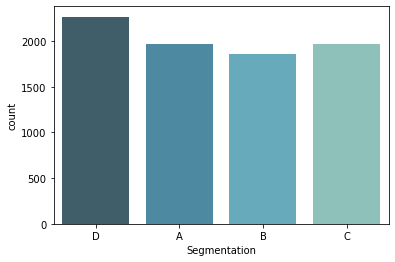

In [229]:
sns.countplot(x = 'Segmentation', palette = 'GnBu_d', data = train_final1);

In [230]:
# encoding_list = ['Segmentation']
# train_final1[encoding_list] = train_final1[encoding_list].apply(LabelEncoder().fit_transform)

In [305]:
# sns.countplot(x = 'Segmentation', palette = 'GnBu_d', data = train_final1);

In [307]:
# Splitting training dataset into train and test
X = train_final.copy().drop(['Segmentation'], axis=1).values
y = train_final['Segmentation']

In [300]:
test = test.copy().values

In [310]:
print(train.shape)
print(X.shape)
print(y.shape)

(8068, 11)
(8068, 9)
(8068,)


In [323]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=99)

In [325]:
X_test.shape

(2017, 9)

In [350]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
# X_whole = sc.transform(X.copy())
# test_v = sc.transform(test)

In [354]:
# test_v = sc.transform(test)

In [362]:
!pip install catboost

^C


In [359]:
import catboost as cat
from sklearn import metrics

# n_estimators=500, random_state=10, learning_rate=0.9
ada = xgb.XGBClassifier()
ada_fit = ada.fit(X_train, y_train)

In [360]:
y_ada_pred_test = ada_fit.predict(X_test)
y_ada_pred_train = ada_fit.predict(X_train)

In [361]:
print(metrics.accuracy_score(y_test, y_ada_pred_test))#test accuracy
print(metrics.accuracy_score(y_train, y_ada_pred_train))#train accuracy

0.503222607833416
0.8016856717897868
